# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('./instacart_orders.csv', sep=';')
df_products = pd.read_csv('./products.csv', sep=';')
df_order_products = pd.read_csv('./order_products.csv', sep=';')
df_aisles = pd.read_csv('./aisles.csv', sep=';')
df_departments = pd.read_csv('./departments.csv', sep=';')

In [3]:
# mostrar información del DataFrame df_orders
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
df_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [5]:
# mostrar información del DataFrame df_products
df_products.info()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
df_products.describe()

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [7]:
# mostrar información del DataFrame df_order_products
df_order_products.info(show_counts=True)
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [8]:
df_order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [9]:
# mostrar información del DataFrame df_aisles
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
df_aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [11]:
# mostrar información del DataFrame df_departments
df_departments.info()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
df_departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. 
Descripción de los datos.

Se observa que en el primer dataframe (df_orders) contiene los pedidos en la aplicación. En las primeras filas no hay valores nulos y son de tipo int 64, en days_since_prior_order sí hay valores nulos y este dato es de tipo float64 y el número es bastante considerable, se puede observar que el rango en este va de 0-30 días. 
En el segundo dataframe(df_products) se observan los productos únicos que pueden comprar los clientes, se observa que en una de las 4 columnas (product_name) hay valores nulos y en este caso es de tipo object. 
En el tercer dataframe (df_order_products)se observan los articulos pedidos en un pedido, en este caso no contiene valores nulos. 
En el cuarto dataframe (df_aisles) se muestra la información de los pasillos y en este caso tampoco hay valores nulos.
Finalmente se puede observar el dataframe (df_departments) mostrando la información de los departamentos en el que tampoco hay valores nulos. 

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1.-Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
Se observará con el metodo info. 


2.-Identifica y completa los valores ausentes.
Se identificarán con el método info e isna y se completarán con filna

3.-Identifica y elimina los valores duplicados.
Se identificarán por medio del procesamiento de valores duplicados con el método duplicated y el método drop_duplicates


4.-¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?
Creo que puede haber valores ausentes debido algúna actualización de la app en donde se haya guardado el id pero no el nombre del producto o que sea algún producto nuevo en el que aún no se le haya asignado el nombre. Por otra parte podría haber valores duplicados porque algún error en la aplicación.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [13]:
# Revisa si hay pedidos duplicados
duplicated=df_orders.duplicated().sum()
print('El número de pedidos duplicados es:', duplicated)
print()
duplicated_rows = df_orders[df_orders.duplicated()] 
print('Las filas duplicadas son:') 
print(duplicated_rows)

El número de pedidos duplicados es: 15

Las filas duplicadas son:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3        

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Lo que tienen en común son el día de la semana en que se hizo un pedido, en este caso se realizaron el día 3 de la semana o miércoles y la hora del día en que se hizo el pedido, en este caso, la segunda hora del día (2 am).

In [14]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
filtered_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
print(filtered_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
Que hay 121 ordenes o pedidos que se hicieron en día miércoles a las 2am. 

In [15]:
# Elimina los pedidos duplicados
df_orders.drop_duplicates(inplace=True)
print(df_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [16]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())

0


In [17]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(df_orders.duplicated(subset='order_id').sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se trabajaron de manera adecuada los valores duplicados tanto para onbservarlos como para su eliminación. 
Se comprobó la eliminación de los mismos con el método duplicated().sum y con el método subset(). De igual forma se comprobó que el ID sea entero en la observación de la información con el método info().

### `products` data frame

In [18]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [19]:
# Verifica si hay IDs duplicadas de productos
print(df_products.duplicated(subset='product_id').sum())

0


In [20]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'].str.upper()
print(df_products.duplicated(subset='product_name').sum())

1257


In [21]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[~(df_products['product_name'].isna())&(df_products['product_name'].str.upper().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron 1257 nombres de productos duplicados y 104 nombres duplicados de productos no faltantes (no nulos). Supongo que esto debe ser común por ejemplo en nuevas ediciones de productos o ediciones limitadas de productos en donde se duplican los nombres, por ejemplo algunos chocolates que de pronto tienen ediciones de doble chocolate pero conservan el mismo lugar en los estantes y los mismos costos, etc.

### `departments` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [23]:
# Revisa si hay IDs duplicadas de productos
print(df_departments.duplicated(subset='department_id').sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este caso no se encontraron filas totalmente duplicadas y tampoco IDs duplicados en productos, creo que esto se debe a que la cantidad de departamentos (21) es pequeña a comparación de otras categorías.

### `aisles` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [25]:
# Revisa si hay IDs duplicadas de productos
print(df_aisles.duplicated(subset='aisle_id').sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este caso no se encontraron filas totalmente duplicadas y tampoco IDs duplicados en productos. Creo que al igual que en el caso anterior hay una cantidad que no es grande (134) pasillos y esto da menos probabilidades de errores en la captura y ordenamiento de los dataframes.

### `order_products` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [27]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products.duplicated(subset=['order_id', 'product_id']).sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
En este caso no se encontraron filas totalmente duplicadas y tampoco algún otro duplicado engañoso, aquí se hizo la prueba con order_id y product_id porque considero que estos son los que podrían haber tenido posibilidad de duplicarse. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [28]:
# Encuentra los valores ausentes en la columna 'product_name'
missing=df_products[(df_products['product_name'].isna())]
print(missing)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Se encontraron 1250 valores ausentes y se observa que están en el pasillo 100 del departamento 21, el cuál es el último departamento de la tienda.

In [29]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
all_missing= (missing['aisle_id']==100).all()
print(all_missing)

True


Describe brevemente cuáles son tus hallazgos. 
Se encontró que efectivamente todos los nombres de productos ausentes están relacionados con el pasillo ID 100 por medio de la comprobación .all().

In [30]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
all_products_names= (missing['department_id']==21).all()
print(all_products_names)

True


Describe brevemente cuáles son tus hallazgos.
Se encontró que efectivamente todos los nombres de productos ausentes están relacionados con el departamento ID 21 por medio de la comprobación .all().

In [31]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = df_products[df_products['aisle_id'] ==100].count()
print(aisle_100)
print()
department_21=df_products[df_products['department_id']==21].count()
print(department_21)

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Se comprobó por medio de las tablas la información encontrada en los dos pasos anteriores ya que se contaron los valores ausentes que como resultado fueron 1258.

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name']=df_products['product_name'].fillna(value='Unknown')
df_products['product_name'].isna().sum()

np.int64(0)

In [33]:
#Comprobación de haber completado los nombres
df_products[df_products['product_id']==38]

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se completaron los productos ausentes con el metodo fillna y posteriormente se hizo la comprobación con el producto con el id=38 para visualizar que el nombre ahora es Unknown.

### `orders` data frame

In [34]:
# Encuentra los valores ausentes
df_orders[df_orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

df_orders[(df_orders['days_since_prior_order'].isna())&(df_orders['order_number']!=1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se encontraron 28817 valores ausentes en la columna days_since_prior_order.
Se comprobó que todos estos valores son en el primer pedido del cliente y esto se debe a que al ser el primero, no existe algún dato para asignar en esa columna.

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
df_order_products[df_order_products['add_to_cart_order'].isna()]


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('El valor mínimo es:', df_order_products['add_to_cart_order'].min())
print('El valor máximo es:', df_order_products['add_to_cart_order'].max())

El valor mínimo es: 1.0
El valor máximo es: 64.0


Describe brevemente cuáles son tus hallazgos.
Se encontraron 836 valores ausentes en add_to_cart_order y se observa que el valor mínimo es 1 y el máximo es 64.

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_orders=list(df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'])
ids_orders

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1717990,
 1564093,
 129627,
 264710,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2449164,
 2094761,
 3347453,
 1038146,
 2136777,
 2997021,
 844733,
 844733,
 2136777,
 813364,
 165801,
 2256933,
 171934,
 264710,
 2449164,
 2409109,
 3347453,
 813364,
 2926893,
 936852,
 1730767,
 1169835,
 733526,
 844733,
 293169,
 61355,
 903110,
 1968313,
 733526,
 2136777,
 2926893,
 404157,
 1386261,
 171934,
 3125735,
 747668,
 3308010,
 1169835,
 1800005,
 1961723,
 936852,
 2849370,
 3308010,
 61355,
 871281,
 1717990,
 813364,
 388234,
 61355,
 3125735,
 1959075,
 61355,
 3125735,
 1648217,
 171934,
 3125735,
 61355,
 1477139,
 1959075,
 1717990,
 1717990,
 61355,
 1717990,
 171934,
 1038146,
 3308010,
 3347453,
 102236,
 936852,
 171934,
 1730767,
 2926893,
 1021563,
 1832957,
 1959075,
 2256933,
 1968313,
 2721963,
 293169,
 102236,
 3125735,
 1959075,
 264710,


In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

df_order_products[df_order_products['order_id'].isin(ids_orders)].groupby('order_id')['product_id'].count().sort_values()



order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.
Se guardaron todos los valores en orden de lista porque al no ser muy grande el número, sería más facil de tratar posteriormente, con la obtención del valor mínimo y máximo se pudo observar que todos los pedidos con valores ausentes tienen más de 64 productos. Al ralizar el conteo por product_id se observa que el mínimo valor en este caso es 65.

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].fillna(value=999)
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].astype(int)
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se reemplazaron los valores ausentes en add_to_cart de manera exitosa con el metodo fillna y se convirtieron a enteros con asytipe. Se realizó la comprobación con el método info.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se realizó de manera exitosa el preprocesamiento de los datos y es aquí en donde se obtuvo una mayor comprensión de por qué existían valores duplicados así como nulos, el ejemplo claro es en donde todos los valores ausentes en days_since_prior_order se debe a que no se puede tener información para esta columna en donde es el primer pedidio de los clientes. Se realizó de manera exitosa la visualización de duplicados y su eliminación así como los ausentes y la asignación de un nuevo valor en las filas correspondientes.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
invalid_hour = df_orders[(df_orders['order_hour_of_day'] < 0) | (df_orders['order_hour_of_day']> 23)]
invalid_hour

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [42]:
invalid_dow = df_orders[(df_orders['order_dow'] < 0) | (df_orders['order_dow']> 6)]
invalid_dow

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Escribe aquí tus conclusiones

Se observa que los valores son sensibles ya que se realizó busqueda de los que no cumplían las condiciones requeridas y no se encontró alguno. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

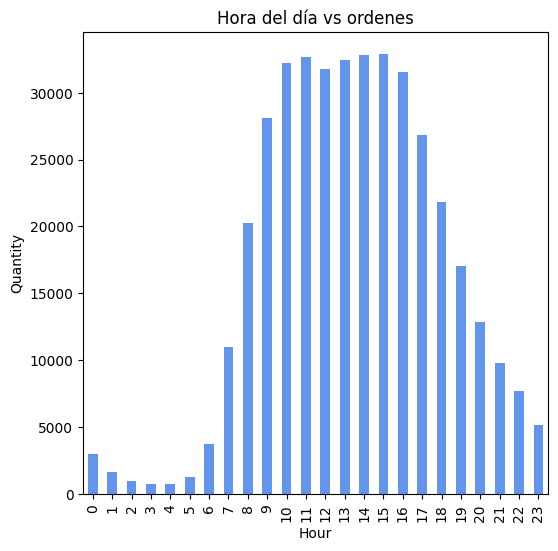

In [43]:
hour_orders=df_orders.groupby('order_hour_of_day')['user_id'].nunique().reset_index()

hour_orders.plot(x='order_hour_of_day', 
        y='user_id', 
        kind='bar', 
        color='cornflowerblue',
        title='Hora del día vs ordenes',
        figsize=[6, 6],
        xlabel='Hour',
        ylabel='Quantity',
        legend=False
       )

plt.show()

Escribe aquí tus conclusiones 
Se observa que la mayor cantidad de ordenes se hacen entre las 9:00 am y las 5:00 pm.
A partir de las 4:00 am la cantidad de ordenes comienza a incrementar hasta las 11:00 am, posteriormente se "mantienen" la cantidad de órdenes y a partir de las 3:00 pm las ordenes disminuyen.

### [A3] ¿Qué día de la semana compran víveres las personas?

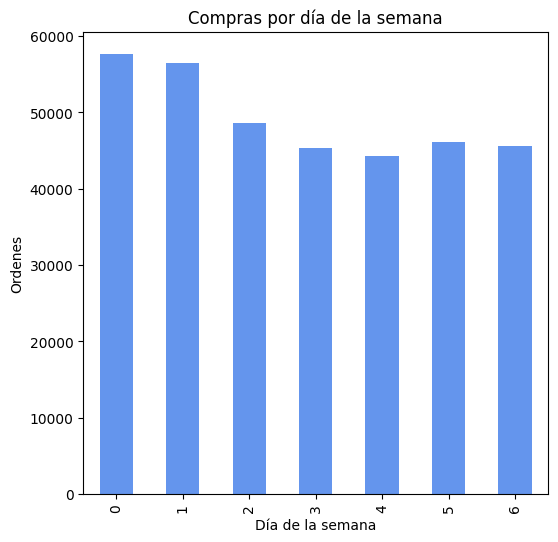

In [44]:
day_orders=df_orders.groupby('order_dow')['user_id'].nunique().reset_index()

day_orders.plot(x='order_dow', 
        y='user_id', 
        kind='bar', 
        color='cornflowerblue',
        title='Compras por día de la semana',
        figsize=[6, 6],
        xlabel='Día de la semana',
        ylabel='Ordenes',
        legend=False
       )

plt.show()

Escribe aquí tus conclusiones
Se observa que el lunes y martes es el día que más ordenes se hacen, probablemente porque esos días las personas hacen el super para el resto de la semana.


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

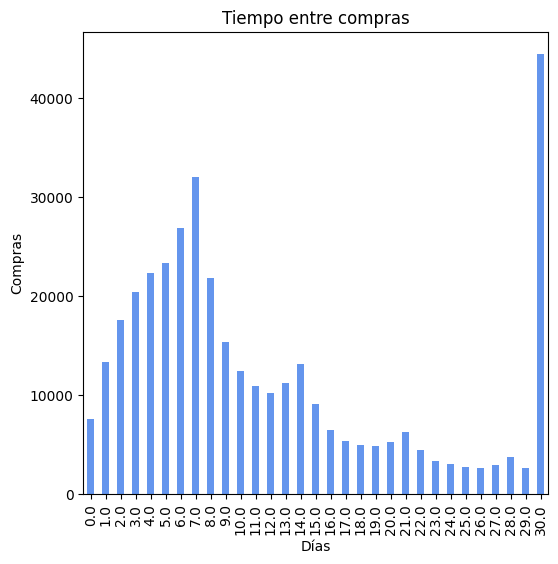

In [45]:
reorder=df_orders.groupby('days_since_prior_order')['user_id'].nunique().reset_index()

reorder.plot(x='days_since_prior_order', 
        y='user_id', 
        kind='bar', 
        color='cornflowerblue',
        title='Tiempo entre compras',
        figsize=[6, 6],
        xlabel='Días',
        ylabel='Compras',
        legend=False
       )

plt.show()

Escribe aquí tus conclusiones

Se observa que la mayor parte está en 30 días, probablemente son personas que hacen pedidos grandes y el super les rinde todo el mes.
También se observa que 7 días es la segunda cantidad más grande en espera y esto también se deba a que hay más compras los primeros días de la semana y sean usuarios que compran el super para una semana. 
A partir de ahí se ibservan picos en el día 14 y 21 y probablemente se deba a lo mismo que en los casos anteriores.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [46]:
wednesday=df_orders[df_orders['order_dow']==3]
saturday=df_orders[df_orders['order_dow']==6]

In [47]:
wednesday_hour=wednesday.groupby('order_hour_of_day')['order_id'].count()
saturday_hour=saturday.groupby('order_hour_of_day')['order_id'].count()

In [48]:
concatenados=pd.concat([wednesday_hour,saturday_hour], axis=1)
concatenados.columns = ['Miércoles', 'Sábado']
concatenados

,Miércoles,Sábado
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


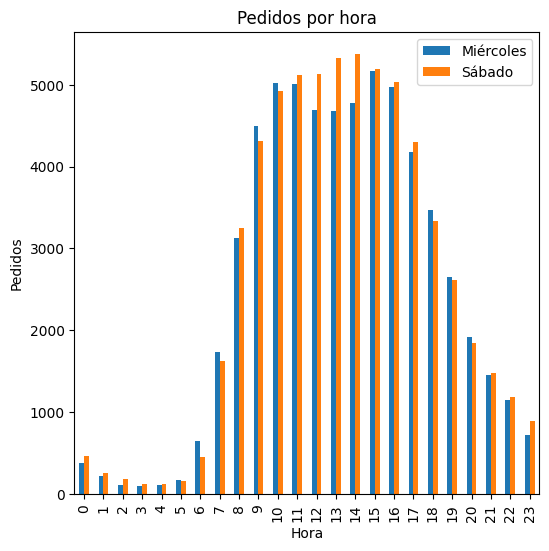

In [49]:
concatenados.plot(  
        kind='bar',
        title='Pedidos por hora',
        figsize=[6, 6],
        xlabel='Hora',
        ylabel='Pedidos'
       )
plt.show()

Escribe aquí tus conclusiones

Se observa que en los valores más grandes que son entre las 11:00 am y las 17:00 la actividad del sábado es mayor,probablemente porque el sábado se tenga más tiempo libre en este horario a diferencia de los miércoles.
A partir de las 18:00 la actividad se invierte y los miércoles hay más órdenes que los sábados.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [50]:
number_per_client=df_orders.groupby('user_id')['order_number'].max().reset_index().groupby('order_number').count()
number_per_client

,user_id
order_number,
1,7840
2,9113
3,10510
4,12368
5,10406
...,...
96,133
97,173
98,148


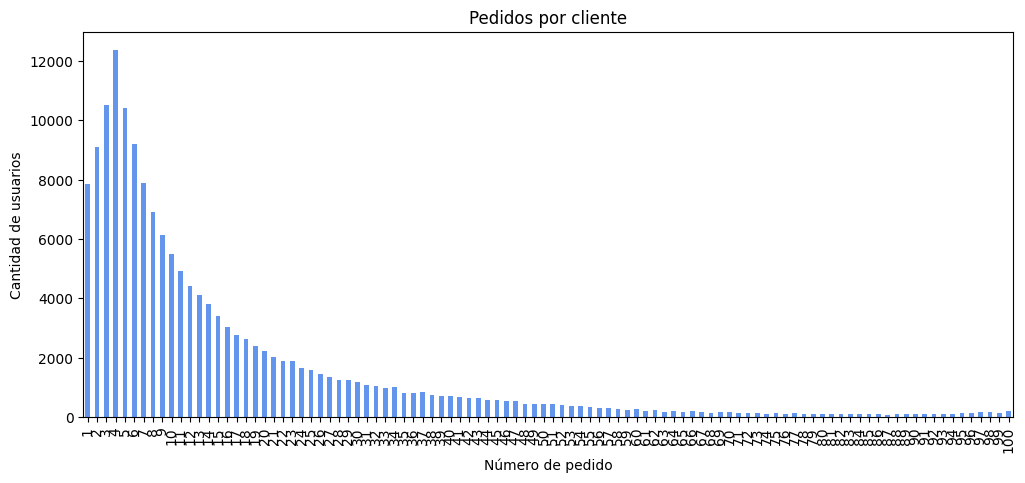

In [51]:
number_per_client.plot(  
        kind='bar',
        title='Pedidos por cliente',
        color='cornflowerblue',
        figsize=[12, 5],
        xlabel='Número de pedido',
        ylabel='Cantidad de usuarios',
        legend=False
       )
plt.show()

Escribe aquí tus conclusiones

Se observa que la mayor cantidad de pedidos por cliente son 3.
De 0 a 3 números de pedidos la catidad de usuarios que realizan ordenes va aumentando pero a partir del pedido número 3, este disminuye hasta llegar a un número muy pequeño. Probablemente sea por la experiencia de compra en la app o el servicio al recibir los productos o el estado de los mismos o simplemente sea una app que usan solo en caso de emergencias.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [52]:
df_merged=df_products.merge(df_order_products,
                         on='product_id')

popular_products=df_merged.groupby(['product_name', 'product_id'])['order_id'].count()
popular_products

product_name                                                     product_id
#2 Coffee Filters                                                25773         110
#2 Cone White Coffee Filters                                     2158            2
#2 Mechanical Pencils                                            26685           3
#4 Natural Brown Coffee Filters                                  26381          39
& Go! Hazelnut Spread + Pretzel Sticks                           20604          15
                                                                              ... 
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum  22381           4
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum        43420          10
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum           42006          14
with a Splash of Mango Coconut Water                             8716            4
with a Splash of Pineapple Coconut Water                         2987           11
Name: order

In [53]:
first_popular_products=popular_products.sort_values(ascending=False).head(20)
first_popular_products

product_name              product_id
Banana                    24852         66050
Bag of Organic Bananas    13176         53297
Organic Strawberries      21137         37039
Organic Baby Spinach      21903         33971
Organic Hass Avocado      47209         29773
Organic Avocado           47766         24689
Large Lemon               47626         21495
Strawberries              16797         20018
Limes                     26209         19690
Organic Whole Milk        27845         19600
Organic Raspberries       27966         19197
Organic Yellow Onion      22935         15898
Organic Garlic            24964         15292
Organic Zucchini          45007         14584
Organic Blueberries       39275         13879
Cucumber Kirby            49683         13675
Organic Fuji Apple        28204         12544
Organic Lemon             5876          12232
Apple Honeycrisp Organic  8277          11993
Organic Grape Tomatoes    40706         11781
Name: order_id, dtype: int64

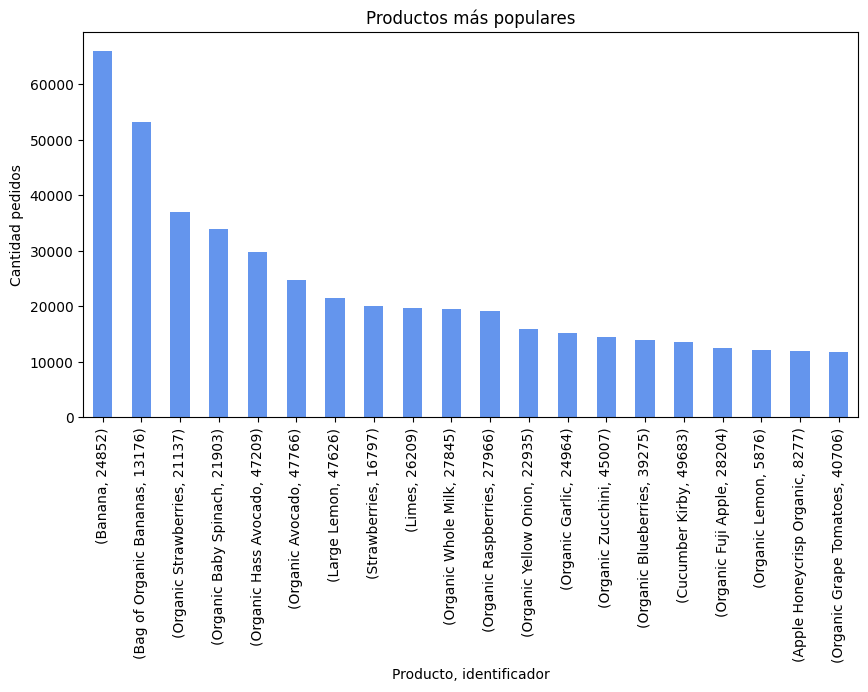

In [54]:
first_popular_products.plot(  
        kind='bar',
        title='Productos más populares',
        color='cornflowerblue',
        figsize=[10, 5],
        xlabel='Producto, identificador',
        ylabel='Cantidad pedidos',
        legend=False
       )
plt.show()

Escribe aquí tus conclusiones
Se observa que los productos más populares son frutas y verduras pero sobre todo las bananas.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [55]:
amount=df_order_products.groupby('order_id')['product_id'].count()
amount

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

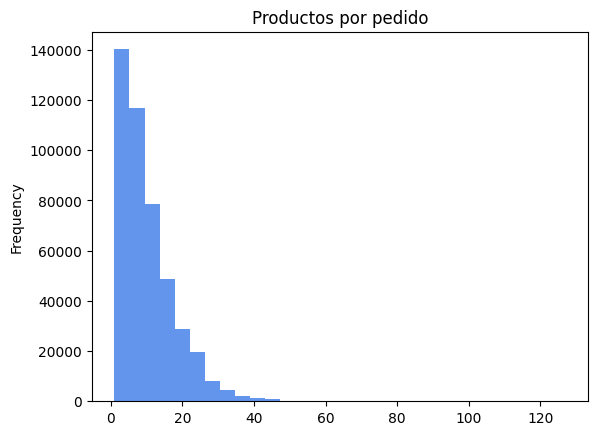

In [56]:
amount.plot(  
        kind='hist',
        title='Productos por pedido',
        color='cornflowerblue',
        bins=30,
       )
plt.show()

Escribe aquí tus conclusiones

Se observa que la mayor parte de los pedidos tienen de 0 a 5 productos y hasta 20, después del articulo 20 el número comienza a disminuir considerablemente. Probablemente porque llegan al tope de su presupuesto o son la cantidad de articulos suficientes. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [57]:
reordered_products=df_order_products[df_order_products['reordered']==1]

dfmerged=df_products.merge(reordered_products,
                         on='product_id')

reordered_products=dfmerged.groupby(['product_name', 'product_id'])['order_id'].count()
top_products_reordered=reordered_products.sort_values(ascending=False).head(20)

In [58]:
top_products_reordered

product_name              product_id
Banana                    24852         55763
Bag of Organic Bananas    13176         44450
Organic Strawberries      21137         28639
Organic Baby Spinach      21903         26233
Organic Hass Avocado      47209         23629
Organic Avocado           47766         18743
Organic Whole Milk        27845         16251
Large Lemon               47626         15044
Organic Raspberries       27966         14748
Strawberries              16797         13945
Limes                     26209         13327
Organic Yellow Onion      22935         11145
Organic Garlic            24964         10411
Organic Zucchini          45007         10076
Cucumber Kirby            49683          9538
Organic Fuji Apple        28204          8989
Apple Honeycrisp Organic  8277           8836
Organic Blueberries       39275          8799
Organic Lemon             5876           8412
Organic Half & Half       49235          8389
Name: order_id, dtype: int64

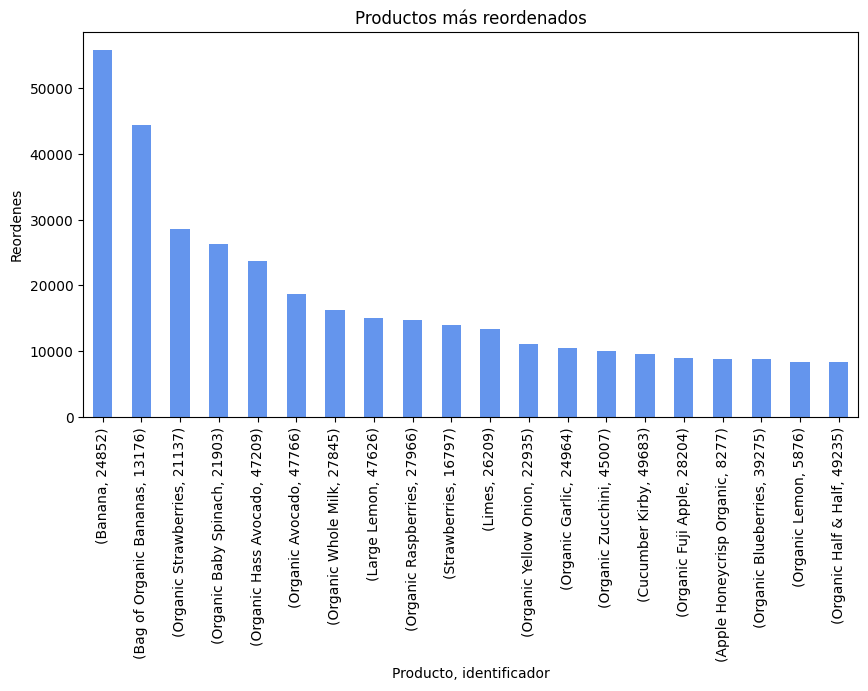

In [59]:
top_products_reordered.plot(  
        kind='bar',
        title='Productos más reordenados',
        color='cornflowerblue',
        figsize=[10, 5],
        xlabel='Producto, identificador',
        ylabel='Reordenes',
        legend=False
       )
plt.show()

Escribe aquí tus conclusiones
Se observa que los productos más populares también se encuentran aquí en los primeros puestos y es lógico porque es la mayor cantidad de ventas por producto que se tienen.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [60]:
total_orders_per_product=df_order_products.groupby('product_id')['order_id'].count().reset_index()
reordered_final=df_order_products.groupby('product_id')['reordered'].sum().reset_index()

In [61]:
merge=reordered_final.merge(total_orders_per_product, on='product_id')

merge['proportion']=merge['reordered']/merge['order_id']
merge

,product_id,reordered,order_id,proportion
0,1,158,280,0.564286
1,2,0,11,0.000000
2,3,31,42,0.738095
3,4,25,49,0.510204
4,7,1,2,0.500000
...,...,...,...,...
45568,49690,4,5,0.800000
45569,49691,31,72,0.430556
45570,49692,5,12,0.416667
45571,49693,11,25,0.440000


Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
_df_merged=df_order_products.merge(df_orders, on='order_id')

_final_reordered=_df_merged.groupby('user_id')['reordered'].sum().reset_index()

total_order=_df_merged.groupby('user_id')['product_id'].count().reset_index()


In [63]:
_merged_=total_order.merge(_final_reordered, on='user_id')
_merged_['proportion']=_merged_['reordered']/_merged_['product_id']
_merged_

,user_id,product_id,reordered,proportion
0,2,26,1,0.038462
1,4,2,0,0.000000
2,5,12,8,0.666667
3,6,4,0,0.000000
4,7,14,13,0.928571
...,...,...,...,...
149621,206203,27,6,0.222222
149622,206206,21,15,0.714286
149623,206207,46,41,0.891304
149624,206208,125,87,0.696000


Escribe aquí tus conclusiones
Se puede observar que hay una gran cadidad de clientes que piden siempre en el mismo orden, ya que las proporciones son grandes. Se observa que los clientes que hacen más compras tienen una proporción mayor a los que tienen pocas compras. 


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [64]:
first=df_order_products[df_order_products['add_to_cart_order']==1]

df_merged=df_products.merge(first,
                           on='product_id')

first_products=df_merged_['product_name'].value_counts().reset_index()
first_products.columns=['product_name','count']

top_products_added=first_products.sort_values(by='count', ascending=False).head(20)
top_products_added


NameError: name 'df_merged_' is not defined

Escribe aquí tus conclusiones
Se observa que los primeros productos que se agregan en primer lugar coinciden en su mayoría con los 20 productos más vendidos y reordenados.

### Conclusion general del proyecto:
Con la realización de este proyecto se tuvo un acercamiento a lo que es el análisis de datos, ya que se realizó el análisis de diferenvendidoasrames mediante el prreodenanmiento de los mismos al observar en primer lugar los datos ausentes y duplicados y arreglando estos problemas con los métodos correspondientes.
En segundo lugar se observaron patrones en los dataframes como por qué podría haber los valores ausentes 
y duplicados. 
Se procedió a realizar ejercicios y observar gráficamente el comportamiento de las órdenes de productos se observó cuales son los productos más vendidoas así como los que más se reordenan y aquellos que se ponen en primer lugar en los carritos de compras en donde se observó la preferencias de los clientes por frutas y verduras.
También se observaron distintas proporciones en los artículos que se reodenan por producto y por usuario.
Finalmente se pudo observar que en la mayoría de los casos es mucho más fácil en análisis de los datos cuando se grafican porque con el metodo info() se puede observar muy poco y observando por partes los datos se pueden llegar a conclusiones más efectivas o más reales.